# Introducción a las Redes Neuronales


Una **red neuronal feedforward** (también llamada **perceptrón multicapa** o **MLP**) es un modelo de aprendizaje automático capaz de aproximar relaciones **no lineales** complejas entre variables de entrada y salida. A diferencia de la regresión lineal o polinómica, que usan funciones fijas, las redes neuronales **aprenden** funciones no lineales a partir de los datos mediante una arquitectura compuesta por **capas de neuronas artificiales**.<br><br><br>


Una red neuronal típica está formada por:
- Una **capa de entrada**, que recibe los datos.
- Una o más **capas ocultas**, donde ocurren transformaciones intermedias no lineales.
- Una **capa de salida**, que produce la predicción.<br><br><br>

Cada **capa lineal** realiza una transformación afín seguida de una función de activación:

$$
\mathbf{z}^{[l]} = \mathbf{W}^{[l]} \mathbf{a}^{[l-1]} + \mathbf{b}^{[l]} \\
\mathbf{a}^{[l]} = g^{[l]}(\mathbf{z}^{[l]})
$$

donde:

- $\mathbf{a}^{[l-1]}$ es el vector de activaciones de la capa anterior,
- $\mathbf{W}^{[l]}$ es la matriz de pesos de la capa $l$,
- $\mathbf{b}^{[l]}$ es el vector de sesgos (bias),
- $g^{[l]}$ es una función de activación no lineal (por ejemplo, ReLU o Tanh).

**Regresión**

Supongamos una red neuronal con dos capas ocultas:

$$
\begin{align*}
\mathbf{z}^{[1]} &= \mathbf{W}^{[1]} \mathbf{x} + \mathbf{b}^{[1]} \\
\mathbf{a}^{[1]} &= \text{ReLU}(\mathbf{z}^{[1]}) \\
\mathbf{z}^{[2]} &= \mathbf{W}^{[2]} \mathbf{a}^{[1]} + \mathbf{b}^{[2]} \\
\mathbf{a}^{[2]} &= \text{ReLU}(\mathbf{z}^{[2]}) \\
\hat{y} &= \mathbf{W}^{[3]} \mathbf{a}^{[2]} + b^{[3]}
\end{align*}
$$

Donde $\hat{y}$ es la **predicción escalar continua** de la red.<br><br><br>

Usamos típicamente el **error cuadrático medio (MSE)** como función de pérdida:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

**Clasificación binaria**

En problemas donde $y \in \{0, 1\}$, la salida $\hat{y}$ representa la **probabilidad** de que la muestra pertenezca a la clase positiva.<br><br><br>

La arquitectura es similar, pero la **última capa** usa una función sigmoide:

$$
\hat{y} = \sigma(\mathbf{W}^{[3]} \mathbf{a}^{[2]} + b^{[3]}) \quad \text{con} \quad \sigma(z) = \frac{1}{1 + e^{-z}}
$$

Y usamos la **entropía cruzada binaria** como función de pérdida:

$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$


El objetivo es **ajustar los parámetros** $\theta = \{ \mathbf{W}^{[l]}, \mathbf{b}^{[l]} \}$ para minimizar la función de pérdida $J(\theta)$ usando **descenso por gradiente** o una variante como **Adam**.<br><br><br>

El procedimiento es:<br><br><br>

1. **Propagación hacia adelante**: se calcula la predicción $\hat{y}$.
2. **Cálculo del error**: se compara con la salida esperada $y$.
3. **Retropropagación**: se calculan los gradientes.
4. **Actualización de pesos**: se actualizan los parámetros para reducir el error.<br><br><br>


Las redes neuronales son **modelos universales de aproximación**: con suficientes neuronas y datos, pueden aproximar casi cualquier función.<br><br><br>

Sin embargo, para obtener buenos resultados, se requiere:<br><br><br>

- Suficiente cantidad y calidad de datos,
- Arquitectura adecuada (número de capas y neuronas),
- Buenas prácticas de regularización y validación.

En este taller consideraremos los dos casos (regresión y clasificación binaria) para aplicarlos a datos reales. Pero antes, entendamos la estructura de las redes neuronales en PyTorch.

## Parte 1: Construyendo Redes Neuronales con PyTorch

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Reproducibilidad casi completa (no funciona para tarjetas gráficas exóticas)

def set_seed(seed=42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if using multi-GPU
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [3]:
torch.manual_seed(42)

modelo_1 = nn.Sequential(
   nn.Linear(784, 256),    # salida_lin = w * entrada + b
   nn.ReLU(),              # g(salida_lin) (activación)
   # Juntas estas forman la capa 1
   
   nn.Linear(256, 128),   
   nn.Sigmoid(),              
   # Juntas estas forman la capa 2

   nn.Linear(128, 128),
   nn.Tanh()
)
modelo_1

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): Tanh()
)

In [4]:
# PyTorch siempre quiere calcular gradientes, ¡Entonces le decimos que se relaje!

with torch.no_grad():
    print(modelo_1[1](torch.tensor(1.0))) # Correr partes lineales con torch.linspace!
    print(modelo_1[3](torch.tensor(2.0)))


tensor(1.)
tensor(0.8808)


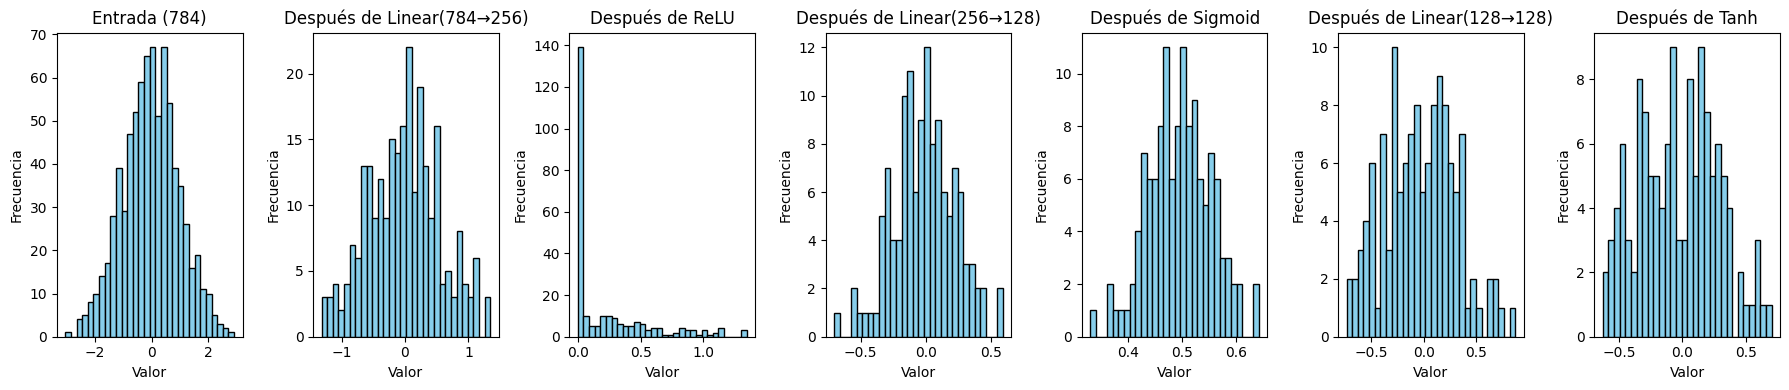

In [5]:
# Entrada aleatoria
entrada = torch.randn(1, 784)

# Guardar salidas capa por capa
with torch.no_grad():
    salidas = [entrada]
    for capa in modelo_1:
        salida = capa(salidas[-1])
        salidas.append(salida)

# Convertir a NumPy para graficar
salidas_np = [s.detach().numpy().flatten() for s in salidas]

# Crear gráfico
fig, axes = plt.subplots(1, len(salidas_np), figsize=(18, 4), sharey=False)

titulos = [
    "Entrada (784)",
    "Después de Linear(784→256)",
    "Después de ReLU",
    "Después de Linear(256→128)",
    "Después de Sigmoid",
    "Después de Linear(128→128)",
    "Después de Tanh"
]

for i, (salida, ax) in enumerate(zip(salidas_np, axes)):
    ax.hist(salida, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(titulos[i])
    ax.set_xlabel("Valor")
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Veamos qué pasa paso a paso.

## Parte 2: Regresión con Redes Neuronales

In [6]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import torch.optim as optim
import pandas as pd
import seaborn as sns

In [7]:
diabetes = load_diabetes() # ¡Los valores ya están estandarizados!
df_diabetes = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target # Métrica numérica que indica la progresión de la enfermedad.
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
df_diabetes.dtypes.unique() 

array([dtype('float64')], dtype=object)

In [9]:
df_diabetes.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

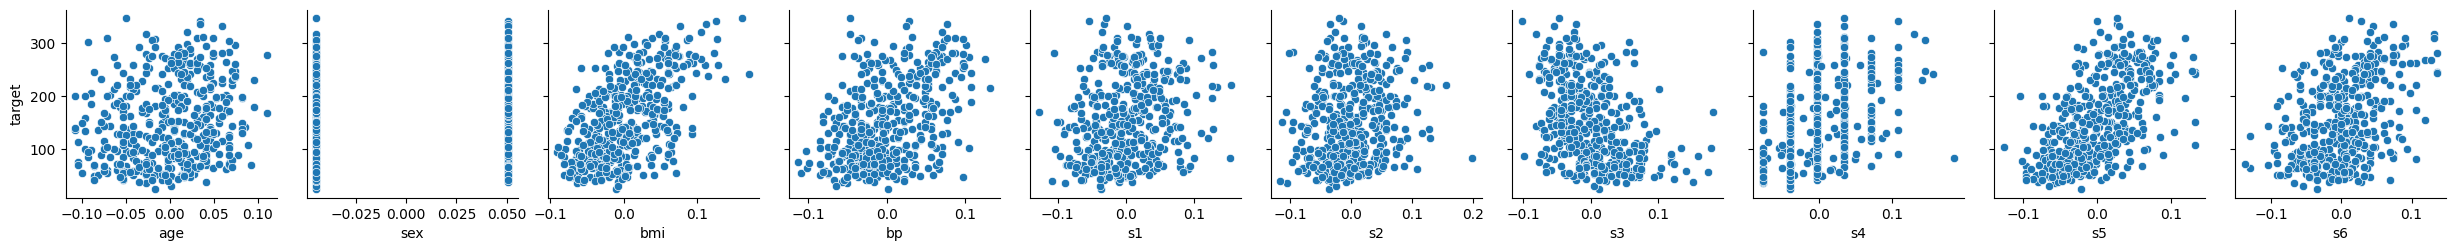

In [10]:
plt.figure(figsize=(20, 20)) 
sns.pairplot(df_diabetes, y_vars=['target'], x_vars=diabetes.feature_names)
plt.show()

In [11]:
# Por facilidad, eliminamos características no lineales. ¡Evitar esto en la vida real!.

X_t = df_diabetes.drop(columns=['age', 'sex', 's1', 's2', 's4'])
X_t.head()

,bmi,bp,s3,s5,s6,target
0,0.061696,0.021872,-0.043401,0.019907,-0.017646,151.0
1,-0.051474,-0.026328,0.074412,-0.068332,-0.092204,75.0
2,0.044451,-0.005670,-0.032356,0.002861,-0.025930,141.0
3,-0.011595,-0.036656,-0.036038,0.022688,-0.009362,206.0
4,-0.036385,0.021872,0.008142,-0.031988,-0.046641,135.0


A continuación entrenmos el modelo lineal con `scikit-learn`. No vamos a hacer validación cruzada aquí para chequear generalización por cuestiones pedagógicas, pero ¡recordemos que siempre es buena práctica hacerlo!

In [12]:
y_diabetes = X_t['target'].to_numpy()
X_diabetes = X_t.drop(columns=['target']).to_numpy()

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [13]:
modelo_2 = LinearRegression()
modelo_2.fit(X_diabetes_train, y_diabetes_train)
# modelo_2.coef_
# modelo_2.intercept_

y_diabetes_pred = modelo_2.predict(X_diabetes_test)
print(f'\nError cuadrático medio (MSE) en test: {mean_squared_error(y_diabetes_test, y_diabetes_pred)}')


Error cuadrático medio (MSE) en test: 2926.8176585999395


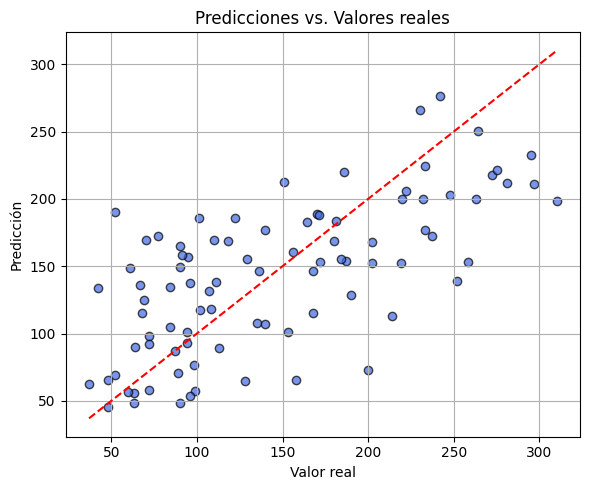

In [14]:
# Gráfico: Predicción vs Valor real
plt.figure(figsize=(6, 5))
plt.scatter(y_diabetes_test, y_diabetes_pred, color='royalblue', edgecolor='k', alpha=0.7)
plt.plot([y_diabetes_test.min(), y_diabetes_test.max()],
         [y_diabetes_test.min(), y_diabetes_test.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Predicciones vs. Valores reales")
plt.grid(True)
plt.tight_layout()
plt.show()


La línea roja representa predicciones perfectas. Por lo tanto, entre más cercano cada punto a la línea roja, mejor la predicción. Esto indica que el modelo tiene un buen comportamiento, pero podría mejorar bastante. Eso lo dejaremos para otra ocasión. Por ahora, vamos a las redes neuronales.

In [15]:
modelo_3 = nn.Sequential(
    nn.Linear(X_diabetes.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

In [ ]:
# modelo_3 = nn.Sequential(
#     nn.Linear(X_diabetes.shape[1], 64),
#     nn.ReLU(),
#     nn.Linear(64, 32),
#     nn.Tanh(),
#     nn.Linear(32, 1)
# )

In [17]:
# Convertimos datos a tensores

X_train_tensor = torch.tensor(X_diabetes_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_diabetes_train, dtype=torch.float32).view(-1, 1) # Cambiamos la forma de y para que sea un vector columna y coincida con la salida del modelo (n muestras, 1 valor por muestra)

X_test_tensor = torch.tensor(X_diabetes_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_diabetes_test, dtype=torch.float32).view(-1, 1)


In [18]:
# Ejemplo

a = torch.tensor([3.0, 2.5, 4.1])
print(a.shape)  # torch.Size([3])
a = a.view(-1,1)
print(a.shape)

torch.Size([3])
torch.Size([3, 1])


In [19]:
# Función de costo y optimizador

criterio = nn.MSELoss()  # Para regresión
optimizador = optim.Adam(modelo_3.parameters(), lr=0.001)

In [20]:
# Entrenamiento

epocas = 3000 # Intentar con otros números

for epoca in range(epocas):
    modelo_3.train()  # Modo entrenamiento

    # Paso hacia adelante (forward)
    salida = modelo_3(X_train_tensor)
    perdida = criterio(salida, y_train_tensor)

    # Paso hacia atrás (backward)/Gradient descent
    optimizador.zero_grad() # Borra gradientes anteriores
    perdida.backward() # Calcula todos los gradientes
    optimizador.step() # Actualiza pesos

    # Mostrar pérdida cada 50 épocas
    if (epoca + 1) % 50 == 0:
        print(f"Época {epoca+1}/{epocas} - Pérdida de entrenamiento: {perdida.item():.4f}")


Época 50/3000 - Pérdida de entrenamiento: 29535.4844
Época 100/3000 - Pérdida de entrenamiento: 29226.7344
Época 150/3000 - Pérdida de entrenamiento: 28571.6836
Época 200/3000 - Pérdida de entrenamiento: 27383.6797
Época 250/3000 - Pérdida de entrenamiento: 25495.1680
Época 300/3000 - Pérdida de entrenamiento: 22868.4902
Época 350/3000 - Pérdida de entrenamiento: 19619.0078
Época 400/3000 - Pérdida de entrenamiento: 16016.2168
Época 450/3000 - Pérdida de entrenamiento: 12452.0068
Época 500/3000 - Pérdida de entrenamiento: 9347.9248
Época 550/3000 - Pérdida de entrenamiento: 7016.0791
Época 600/3000 - Pérdida de entrenamiento: 5536.8599
Época 650/3000 - Pérdida de entrenamiento: 4749.3257
Época 700/3000 - Pérdida de entrenamiento: 4381.8896
Época 750/3000 - Pérdida de entrenamiento: 4208.9619
Época 800/3000 - Pérdida de entrenamiento: 4108.3931
Época 850/3000 - Pérdida de entrenamiento: 4032.2871
Época 900/3000 - Pérdida de entrenamiento: 3965.7478
Época 950/3000 - Pérdida de entrenamie


Error cuadrático medio (MSE) en test: 2955.6392


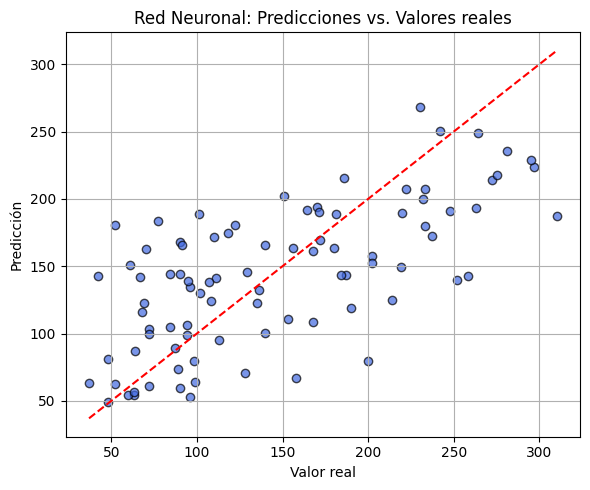

In [21]:
# Evaluación

modelo_3.eval()  

with torch.no_grad():
    predicciones_test = modelo_3(X_test_tensor)
    perdida_test = criterio(predicciones_test, y_test_tensor)
    print(f"\nError cuadrático medio (MSE) en test: {perdida_test.item():.4f}")


plt.figure(figsize=(6, 5))
plt.scatter(y_test_tensor, predicciones_test, color='royalblue', edgecolor='k', alpha=0.7)
plt.plot([y_test_tensor.min(), y_test_tensor.max()],
         [y_test_tensor.min(), y_test_tensor.max()], 'r--')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Red Neuronal: Predicciones vs. Valores reales")
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Número de parámetros del modelo
total_params = sum(p.numel() for p in modelo_3.parameters())
print(f"Número total de parámetros en el modelo: {total_params}")

Número total de parámetros en el modelo: 737


## Parte 3: Clasificación con Redes Neuronales

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Cargamos el dataset de cancer de mama y lo convertimos a DataFrame de pandas

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
# Preparamos los datos para el modelo

X_cancer = df_cancer.drop(columns=['target']).to_numpy()
y_cancer = df_cancer['target'].to_numpy()

# Dividimos los datos en conjuntos de entrenamiento y prueba

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

In [26]:
modelo_sklearn = make_pipeline(MinMaxScaler(feature_range=(0, 1)), LogisticRegression())
modelo_sklearn.fit(X_cancer_train, y_cancer_train)
predicciones_sklearn = modelo_sklearn.predict(X_cancer_test)

In [27]:
# Evaluamos el modelo de sklearn

cm_sklearn = confusion_matrix(y_cancer_test, predicciones_sklearn)
print(f'\n=== sklearn tiene un accuracy de: {accuracy_score(y_cancer_test, predicciones_sklearn):.2f} ===\n'
      f'\n== sklearn tiene {cm_sklearn[0, 0]} verdaderos negativos ==\n'
      f'\n== sklearn tiene {cm_sklearn[1, 1]} verdaderos positivos ==\n'
      f'\n== sklearn tiene {cm_sklearn[0, 1]} falsos positivos ==\n'   
      f'\n== sklearn tiene {cm_sklearn[1, 0]} falsos negativos ==\n'   
      f'\n== sklearn tiene un F1 Score de: {f1_score(y_cancer_test, predicciones_sklearn):.2f} ==\n')


=== sklearn tiene un accuracy de: 0.98 ===

== sklearn tiene 41 verdaderos negativos ==

== sklearn tiene 71 verdaderos positivos ==

== sklearn tiene 2 falsos positivos ==

== sklearn tiene 0 falsos negativos ==

== sklearn tiene un F1 Score de: 0.99 ==



In [28]:
modelo_4 = nn.Sequential(
    nn.Linear(X_cancer.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [29]:
criterio_class = nn.BCELoss()
optimizador = optim.Adam(modelo_4.parameters(), lr=0.001)

In [30]:
X_ct_train = torch.tensor(X_cancer_train, dtype=torch.float32)
X_ct_test = torch.tensor(X_cancer_test, dtype=torch. float32)
y_ct_train = torch.tensor(y_cancer_train, dtype=torch.float32).view(-1,1)
y_ct_test = torch.tensor(y_cancer_test, dtype=torch.float32).view(-1,1)


In [31]:
epocas = 3000

for epoca in range(epocas):
    modelo_4.train()  # Modo entrenamiento

    # Paso hacia adelante (forward)
    salida = modelo_4(X_ct_train)
    perdida = criterio_class(salida, y_ct_train)

    # Paso hacia atrás (backward)/Gradient descent
    optimizador.zero_grad() # Borra gradientes anteriores
    perdida.backward() # Calcula todos los gradientes
    optimizador.step() # Actualiza pesos

    # Mostrar pérdida cada 50 épocas
    if (epoca + 1) % 50 == 0:
        print(f"Época {epoca+1}/{epocas} - Pérdida de entrenamiento: {perdida.item():.4f}")


Época 50/3000 - Pérdida de entrenamiento: 0.6944
Época 100/3000 - Pérdida de entrenamiento: 0.3386
Época 150/3000 - Pérdida de entrenamiento: 0.2797
Época 200/3000 - Pérdida de entrenamiento: 0.2531
Época 250/3000 - Pérdida de entrenamiento: 0.2365
Época 300/3000 - Pérdida de entrenamiento: 0.2251
Época 350/3000 - Pérdida de entrenamiento: 0.2165
Época 400/3000 - Pérdida de entrenamiento: 0.2089
Época 450/3000 - Pérdida de entrenamiento: 0.2019
Época 500/3000 - Pérdida de entrenamiento: 0.1960
Época 550/3000 - Pérdida de entrenamiento: 0.1905
Época 600/3000 - Pérdida de entrenamiento: 0.1850
Época 650/3000 - Pérdida de entrenamiento: 0.1797
Época 700/3000 - Pérdida de entrenamiento: 0.1744
Época 750/3000 - Pérdida de entrenamiento: 0.1693
Época 800/3000 - Pérdida de entrenamiento: 0.1643
Época 850/3000 - Pérdida de entrenamiento: 0.1595
Época 900/3000 - Pérdida de entrenamiento: 0.1550
Época 950/3000 - Pérdida de entrenamiento: 0.1506
Época 1000/3000 - Pérdida de entrenamiento: 0.1463


In [32]:
modelo_4.eval()
with torch.no_grad():
    predicciones_test = modelo_4(X_ct_test)
    predicciones_test_clasificadas = (predicciones_test >= 0.5).int().numpy()

# Convertimos las etiquetas verdaderas a formato NumPy si es necesario
y_test_np = y_ct_test.numpy()

# Métricas
cm_nn = confusion_matrix(y_test_np, predicciones_test_clasificadas)
accuracy_nn = accuracy_score(y_test_np, predicciones_test_clasificadas)
f1_nn = f1_score(y_test_np, predicciones_test_clasificadas)

# Mostrar resultados
print(f"\n=== PyTorch NN tiene un accuracy de: {accuracy_nn:.2f} ===\n"
      f"\n== NN tiene {cm_nn[0, 0]} verdaderos negativos ==\n"
      f"\n== NN tiene {cm_nn[1, 1]} verdaderos positivos ==\n"
      f"\n== NN tiene {cm_nn[0, 1]} falsos positivos ==\n"
      f"\n== NN tiene {cm_nn[1, 0]} falsos negativos ==\n"
      f"\n== NN tiene un F1 Score de: {f1_nn:.2f} ==\n")


=== PyTorch NN tiene un accuracy de: 0.96 ===

== NN tiene 40 verdaderos negativos ==

== NN tiene 70 verdaderos positivos ==

== NN tiene 3 falsos positivos ==

== NN tiene 1 falsos negativos ==

== NN tiene un F1 Score de: 0.97 ==



## ¿Cómo elegir el número de capas y unidades en una red neuronal?

Una de las decisiones más importantes (y difíciles) al diseñar una red neuronal es elegir cuántas **capas ocultas** y cuántas **neuronas por capa** utilizar. Aunque no existe una regla universal, sí hay **criterios prácticos** que te pueden guiar.<br><br><br>

**Número de capas (profundidad)**

- **1 capa oculta** suele ser suficiente para problemas simples o lineales.
- **2 o 3 capas ocultas** funcionan bien para datos tabulares con relaciones no lineales moderadas.
- **4 o más capas** se utilizan en problemas complejos (como imágenes o texto), y requieren más datos y recursos computacionales.

Si estás trabajando con **datos tabulares y pocas variables**, lo típico es usar entre 1 y 3 capas ocultas.<br><br><br>

**Número de neuronas por capa (ancho)**

- Como punto de partida, puedes usar entre **1 y 3 veces el número de variables de entrada**.
- A menudo, se **reduce el número de neuronas en capas posteriores**, para promover la compresión de información.
- ¡Cuidado! A más neuronas, más capacidad, pero también más riesgo de **sobreajuste**.<br><br><br>


**Reglas heurísticas generales**

| Tipo de problema                | Capas ocultas típicas | Neuronas por capa             |
|----------------------------------|------------------------|-------------------------------|
| Regresión/clasificación simple   | 1–2                    | 16–128                        |
| Datos tabulares                  | 2–4                    | entre 1× y 4× el número de inputs |
| Imágenes (CNN)                   | 5 o más                | cientos o miles               |
| Texto (Transformers)            | 12 o más               | cientos o miles               |

